9628
9946
9850
10163
10404
10188
10241
9824
10185
10326
10883
10267
10605
10446
10794
10432
10398
10513
10938
10731


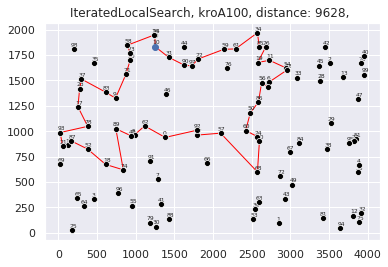

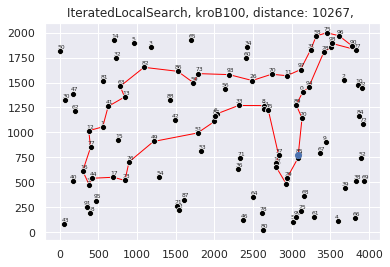

,strategy,instance,cost,time
0,IteratedLocalSearch,kroA100,9628,28.080802
0,IteratedLocalSearch,kroA100,9946,28.015315
0,IteratedLocalSearch,kroA100,9850,28.073423
0,IteratedLocalSearch,kroA100,10163,28.054718
0,IteratedLocalSearch,kroA100,10404,28.061912
0,IteratedLocalSearch,kroA100,10188,28.004854
0,IteratedLocalSearch,kroA100,10241,28.012503
0,IteratedLocalSearch,kroA100,9824,28.098330
0,IteratedLocalSearch,kroA100,10185,28.008630
0,IteratedLocalSearch,kroA100,10326,28.075162


In [1]:
from collections import defaultdict
from itertools import product
from random import seed

import seaborn as sns
import numpy as np
from tqdm import tqdm
from strategies.destroy_repair.destroy_repair import DestroyRepairLocalSearch

from strategies.greedy_cycle.cheapest_insertion import CheapestInsertion
from api.instance import Instance
from strategies.iterated_local_search.iterated_local_search import IteratedLocalSearch
from strategies.local_search.local_search import LocalSearch
from strategies.local_search_candidates_moves.local_search_candidates_moves import LocalSearchWitchCandidatesMoves
from strategies.ls_cache.local_search_with_cache import LocalSearchWitchCache
from strategies.multiple_local_search.multiple_local_search import MultipleStartLocalSearch
from utils.utils import draw_solution
import pandas as pd

sns.set()
df = pd.DataFrame(columns=['strategy','instance', 'cost', 'time'])
for instance_name in ['kroA100', 'kroB100']:
    instance = Instance(name=instance_name)
    solve_strategy1: IteratedLocalSearch = IteratedLocalSearch(
        instance=instance,
        perturbation=12,
    )
    solve_strategies = {}
    solve_strategies["IteratedLocalSearch"] = solve_strategy1
    
    for str_id in solve_strategies.keys():
        solve_strategy = solve_strategies[str_id]
        solve_strategy.run(run_times=10)
        for s, cost, time in solve_strategy.solutions:
            df = df.append(pd.DataFrame([[str_id, instance_name, cost, time]], columns=['strategy','instance', 'cost', 'time']))
        costs = list(map(lambda x: x[1], solve_strategy.solutions))
        draw_solution(
            instance=instance,
            solution=solve_strategy.solution,
            title=f'{str_id}, {instance.name}, distance: {solve_strategy.solution_cost}, ',
            save_file_name=f'{instance.name}_{min(costs)}_{str_id}.png'
        )
df

In [2]:
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  20 non-null     object 
 1   instance  20 non-null     object 
 2   cost      20 non-null     float64
 3   time      20 non-null     float64
dtypes: float64(2), object(2)
memory usage: 800.0+ bytes


In [3]:
df_cost = df.groupby(['instance', 'strategy']).agg({'cost' : ['min','mean', 'max']}).astype(int)
df_cost

cost              
                                min   mean    max
instance strategy                                
kroA100  IteratedLocalSearch   9628  10075  10404
kroB100  IteratedLocalSearch  10267  10600  10938

In [4]:
df_time = df.groupby(['instance','strategy']).agg({'time' : ['min','mean', 'max']}).round(3)
df_time

time                
                                 min    mean     max
instance strategy                                   
kroA100  IteratedLocalSearch  28.005  28.049  28.098
kroB100  IteratedLocalSearch  28.018  28.065  28.128

In [5]:

print(df_cost.to_latex())

\begin{tabular}{llrrr}
\toprule
        &                     & \multicolumn{3}{l}{cost} \\
        &                     &    min &   mean &    max \\
instance & strategy &        &        &        \\
\midrule
kroA100 & IteratedLocalSearch &   9628 &  10075 &  10404 \\
kroB100 & IteratedLocalSearch &  10267 &  10600 &  10938 \\
\bottomrule
\end{tabular}



In [6]:
print(df_time.to_latex())



\begin{tabular}{llrrr}
\toprule
        &                     & \multicolumn{3}{l}{time} \\
        &                     &     min &    mean &     max \\
instance & strategy &         &         &         \\
\midrule
kroA100 & IteratedLocalSearch &  28.005 &  28.049 &  28.098 \\
kroB100 & IteratedLocalSearch &  28.018 &  28.065 &  28.128 \\
\bottomrule
\end{tabular}

